# Load Dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention

Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
License(s): CC0-1.0
100% 87.2k/87.2k [00:00<00:00, 546kB/s]
100% 87.2k/87.2k [00:00<00:00, 545kB/s]


In [ ]:
!unzip higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
  inflating: dataset.csv             


# Exploratory Data Analysis

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/dataset.csv")

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Adaboost

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [6]:
X = df.drop(columns=['Target'])
y = df['Target']

In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [9]:
print(X_train.shape, X_test.shape)

(3096, 34) (1328, 34)


In [10]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

In [11]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [12]:
y_train_pred = model.predict(X_train)

In [13]:
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))

Train Accuracy:  0.7742248062015504


In [14]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.80      0.78      0.79       980
    Enrolled       0.54      0.38      0.44       549
    Graduate       0.81      0.91      0.86      1567

    accuracy                           0.77      3096
   macro avg       0.72      0.69      0.70      3096
weighted avg       0.76      0.77      0.76      3096



In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.7394578313253012


In [17]:
print("\nTest Data Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Data Classification Report:
               precision    recall  f1-score   support

     Dropout       0.77      0.75      0.76       441
    Enrolled       0.47      0.33      0.39       245
    Graduate       0.79      0.89      0.84       642

    accuracy                           0.74      1328
   macro avg       0.67      0.66      0.66      1328
weighted avg       0.72      0.74      0.73      1328



In [18]:
importance_tree = model.feature_importances_

In [20]:
feature_importance_tree = pd.Series(importance_tree, index=X_train.columns)
print("\nTop features from Adaboost:")
print(feature_importance_tree.sort_values(ascending=False))


Top features from Adaboost:
Curricular units 2nd sem (approved)               0.16
Age at enrollment                                 0.08
Curricular units 1st sem (approved)               0.08
Course                                            0.06
Curricular units 2nd sem (grade)                  0.06
Curricular units 2nd sem (evaluations)            0.06
Curricular units 2nd sem (enrolled)               0.06
Mother's occupation                               0.06
Application mode                                  0.04
Father's occupation                               0.04
Curricular units 2nd sem (credited)               0.04
Curricular units 1st sem (grade)                  0.04
Inflation rate                                    0.02
Unemployment rate                                 0.02
Curricular units 1st sem (evaluations)            0.02
Curricular units 1st sem (enrolled)               0.02
Marital status                                    0.02
Scholarship holder                  

# 5-Fold Cross Validation

In [21]:
model2 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [23]:
# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)

In [24]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=cv, scoring='accuracy')
print(f'5-Fold Cross-Validation Accuracy: {cv_scores.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

5-Fold Cross-Validation Accuracy: 0.7567856584501538


In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [26]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [27]:
cv_results = cross_validate(model2, X_train, y_train, cv=cv, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [28]:
print("Cross-Validation Scores for Each Fold:")
for i in range(cv.n_splits):
    print(f"Fold {i+1}:")
    print(f"  Accuracy: {cv_results['test_accuracy'][i]:.4f}")
    print(f"  Precision: {cv_results['test_precision'][i]:.4f}")
    print(f"  Recall: {cv_results['test_recall'][i]:.4f}")
    print(f"  F1-score: {cv_results['test_f1'][i]:.4f}")

Cross-Validation Scores for Each Fold:
Fold 1:
  Accuracy: 0.7484
  Precision: 0.7396
  Recall: 0.7484
  F1-score: 0.7431
Fold 2:
  Accuracy: 0.7851
  Precision: 0.7721
  Recall: 0.7851
  F1-score: 0.7751
Fold 3:
  Accuracy: 0.7480
  Precision: 0.7351
  Recall: 0.7480
  F1-score: 0.7379
Fold 4:
  Accuracy: 0.7367
  Precision: 0.7142
  Recall: 0.7367
  F1-score: 0.7209
Fold 5:
  Accuracy: 0.7658
  Precision: 0.7535
  Recall: 0.7658
  F1-score: 0.7576


In [29]:
print("\nMean Cross-Validation Scores:")
print(f"  Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"  Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"  Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"  Mean F1-score: {cv_results['test_f1'].mean():.4f}")


Mean Cross-Validation Scores:
  Mean Accuracy: 0.7568
  Mean Precision: 0.7429
  Mean Recall: 0.7568
  Mean F1-score: 0.7469


In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_cv_pred = cross_val_predict(model2, X_train, y_train, cv=cv)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [32]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.78       980
    Enrolled       0.47      0.36      0.41       549
    Graduate       0.81      0.89      0.85      1567

    accuracy                           0.76      3096
   macro avg       0.69      0.67      0.68      3096
weighted avg       0.74      0.76      0.75      3096



In [33]:
y_test_cv_pred = cross_val_predict(model2, X_test, y_test, cv=cv)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [34]:
print("\nCross-Validation Classification Report for Testing Data:\n")
print(classification_report(y_test, y_test_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.76      0.72      0.74       441
    Enrolled       0.44      0.36      0.39       245
    Graduate       0.78      0.87      0.82       642

    accuracy                           0.72      1328
   macro avg       0.66      0.65      0.65      1328
weighted avg       0.71      0.72      0.71      1328



# Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', PCA(n_components=10)),
    ('log_reg', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42))
])

In [37]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('dim_red', PCA(n_components=10)),
                ('log_reg', AdaBoostClassifier(random_state=42))])

In [38]:
y_train_pred = pipeline.predict(X_train)

In [39]:
y_test_pred = pipeline.predict(X_test)

In [40]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.78      0.75      0.77       980
    Enrolled       0.46      0.25      0.32       549
    Graduate       0.76      0.90      0.82      1567

    accuracy                           0.74      3096
   macro avg       0.67      0.63      0.64      3096
weighted avg       0.71      0.74      0.72      3096



In [41]:
print("\nClassification Report for Testing Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.77      0.72      0.74       441
    Enrolled       0.40      0.22      0.28       245
    Graduate       0.72      0.88      0.80       642

    accuracy                           0.71      1328
   macro avg       0.63      0.61      0.61      1328
weighted avg       0.68      0.71      0.68      1328



# PCA and 5-fold CV

In [42]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
y_train_cv_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [44]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.75      0.73      0.74       980
    Enrolled       0.40      0.23      0.29       549
    Graduate       0.74      0.87      0.80      1567

    accuracy                           0.71      3096
   macro avg       0.63      0.61      0.61      3096
weighted avg       0.69      0.71      0.69      3096



In [45]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [46]:
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Test Data:

              precision    recall  f1-score   support

     Dropout       0.77      0.72      0.74       441
    Enrolled       0.40      0.22      0.28       245
    Graduate       0.72      0.88      0.80       642

    accuracy                           0.71      1328
   macro avg       0.63      0.61      0.61      1328
weighted avg       0.68      0.71      0.68      1328



# Extra

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

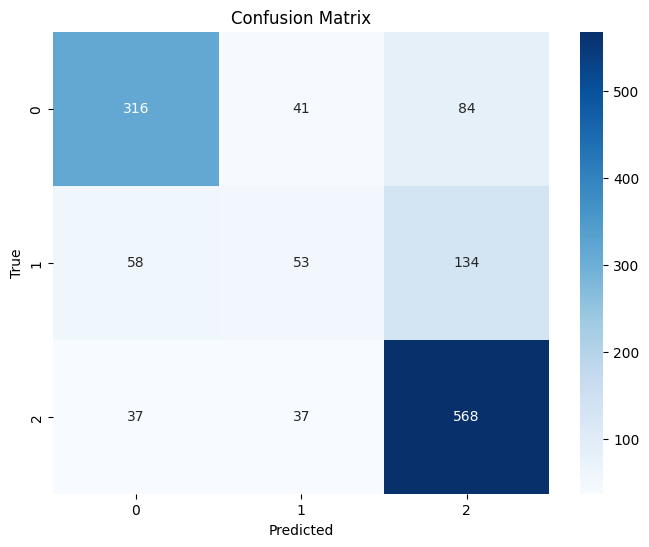

In [48]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()